# Credit Card Fraud Detection

#### 필요 Library 불러오기

In [1]:
import numpy as np
import pandas as pd
import random
import math
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

### 1.데이터 호출 및 형태 확인

In [2]:
org_dt = pd.read_csv(r"C:\Users\seolbluewings\Desktop\sample\creditcard.csv")

In [3]:
org_dt.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time 변수는 의미파악이 어려워 제외시키기로 결정
- V1~V28 변수는 고객의 개인정보 유출 우려로 인해 raw data 컬럼이 아닌, PCA 결과로 생성된 변수로 여겨짐
- Amount는 거래 금액을 의미
- Class : 1값이 사기성 거래, 0값이 정상 거래

In [4]:
dt = org_dt.iloc[:,1:]

In [5]:
dt.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

- .info() 함수를 통해 데이터에 대한 전반적 정보를 확인하였는데 null값이 없는 아주 깔끔한 데이터이다. null값 처리에 대한 과정은 생략!

In [7]:
dt.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

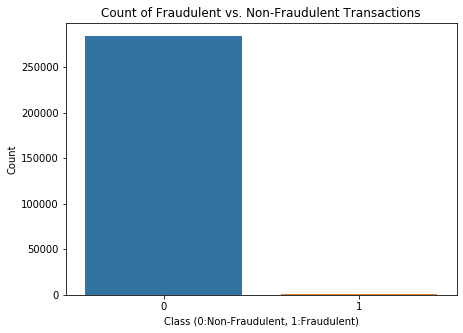

In [16]:
counts = dt.Class.value_counts()

plt.figure(figsize=(7,5))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

- 정상거래가 압도적으로 많으며 사기성 거래는 극히 소수인 것으로 보인다. 따라서 모델 형성 시, 단순한 분류 정확성으로 기준점을 삼는 것은 적절하지 않을 수 있다.
- V1~V28 변수들도 적당한 수준으로 Scaling 된 것으로 보이며
- Amount값은 극단적인 값이 평균에 상당한 영향을 미치는 것으로 보인다

### 2.EDA

#### 가정 1. 사기성 거래와 정상 거래를 구분할 수 있는 변수가 존재할 것이다
- 예를 들면 거래 금액이 비정상적으로 큰 경우, 이를 사기성 거래로 여길 가능성이 높다고 보는게 타당
- 그 외에도 V1~V28 중에서 사기성 거래와 정상 거래를 확실하게 구분할 수 있는 변수가 있을 것이라고 가정

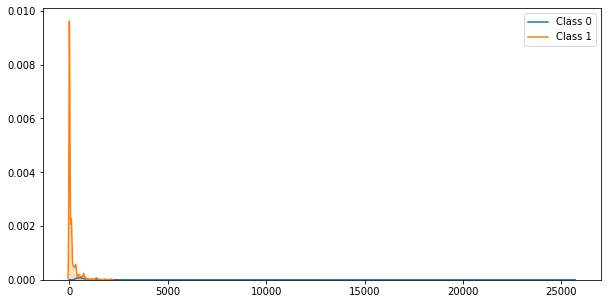

In [8]:
plt.figure(figsize=(10,5))
sns.kdeplot(dt[dt['Class']==0]['Amount'], label="Class 0", shade=True)
sns.kdeplot(dt[dt['Class']==1]['Amount'], label="Class 1", shade=True)

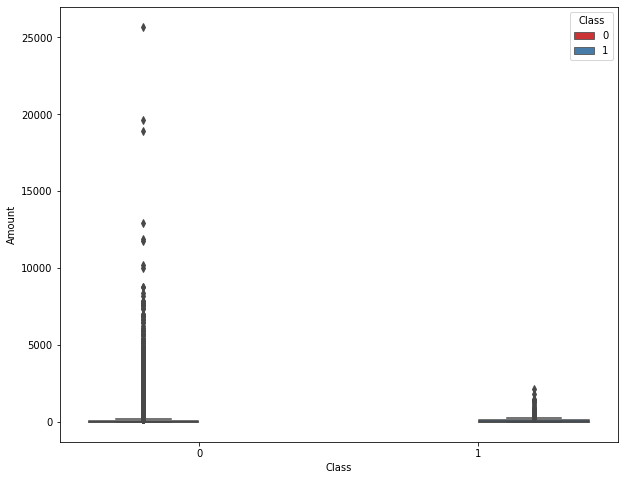

In [9]:
plt.figure(figsize=(10,8))
sns.boxplot(x= 'Class', y = 'Amount', data =dt, hue = 'Class', palette = 'Set1')

- Amount 변수부터 살펴보았는데 이 그림만으로 금액이 높다고 사기성 거래라고 단언할 수 없다고 말할 수 있을 것 같다. 그래도 여전히 Amount는 중요한 변수일 것으로 생각된다. 

#### V1~V28 변수가 각 Class별로 어떻게 분포되어 있는가를 살펴본다
- V3,V4,V10,V11,V12,V14,V16,V17,V18,V19 정도의 변수가 Class별로 분포의 차이를 보임

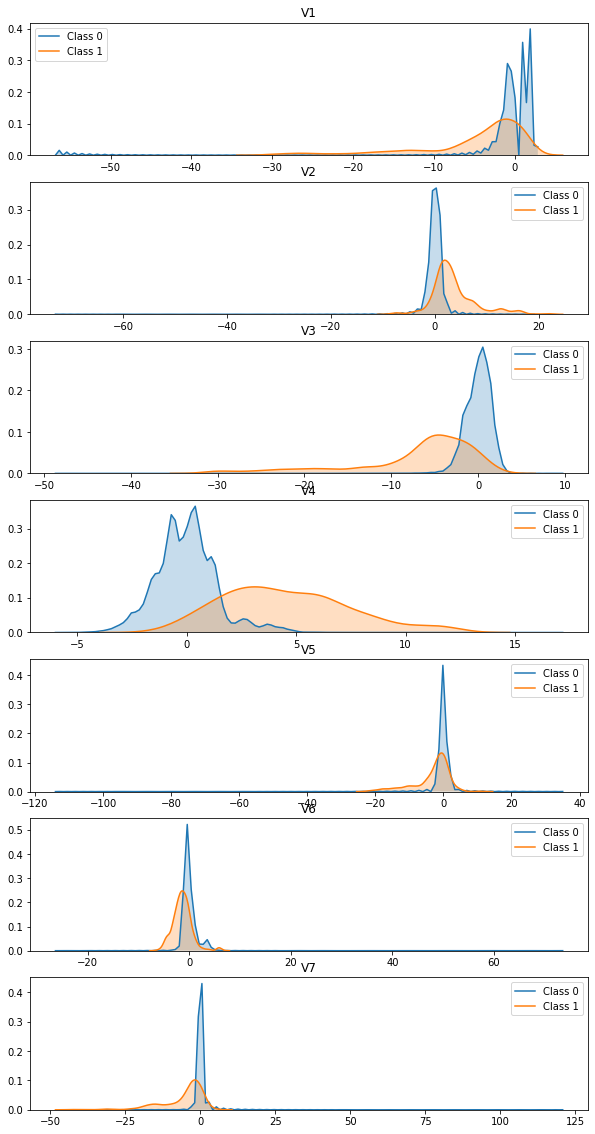

In [10]:
fig, ax = plt.subplots(7,1, figsize = (10,20))

for iter in range(1,8):
    plt.subplot(7,1,iter)
    sns.kdeplot(dt[dt['Class']==0]['V'+str(iter)], label="Class 0", shade=True)
    sns.kdeplot(dt[dt['Class']==1]['V'+str(iter)], label="Class 1", shade=True)
    plt.title('V'+str(iter))

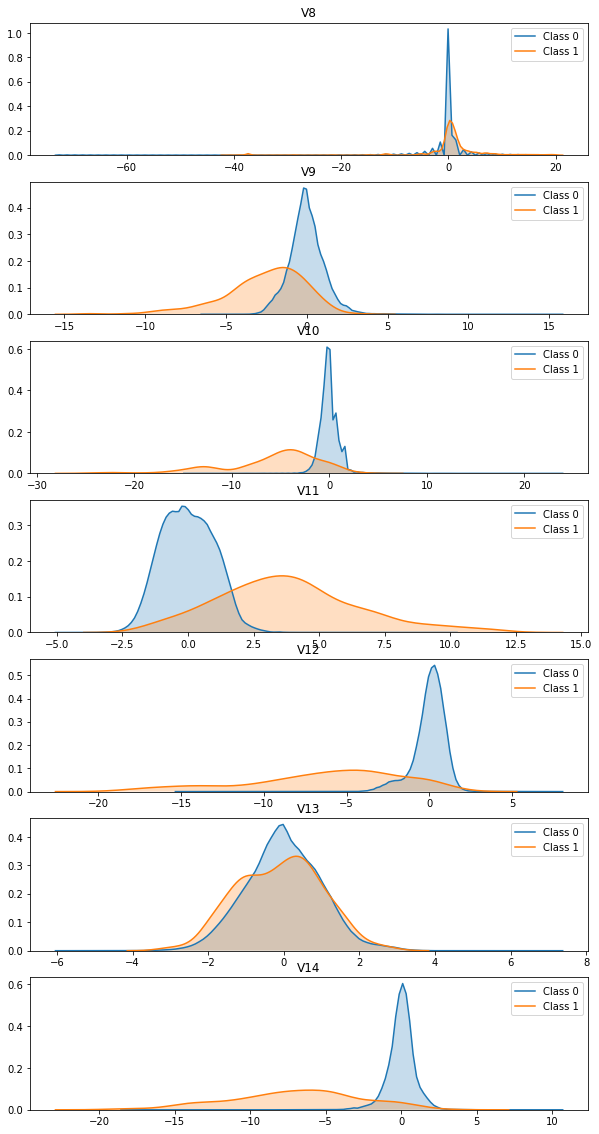

In [11]:
fig, ax = plt.subplots(7,1, figsize = (10,20))

for iter in range(8,15):
    plt.subplot(7,1,iter-7)
    sns.kdeplot(dt[dt['Class']==0]['V'+str(iter)], label="Class 0", shade=True)
    sns.kdeplot(dt[dt['Class']==1]['V'+str(iter)], label="Class 1", shade=True)
    plt.title('V'+str(iter))

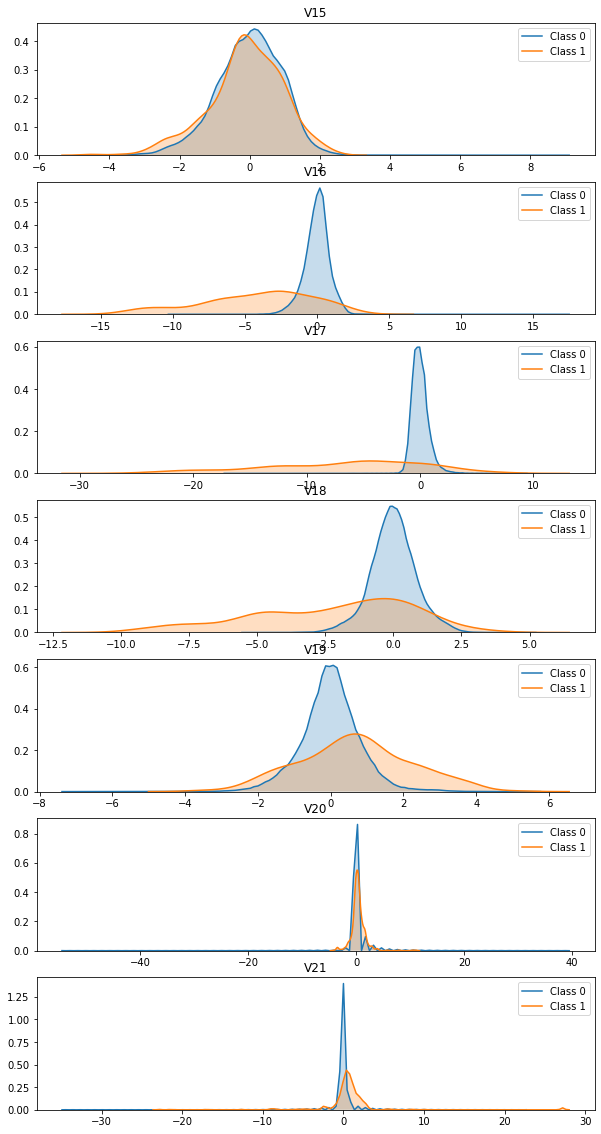

In [12]:
fig, ax = plt.subplots(7,1, figsize = (10,20))

for iter in range(15,22):
    plt.subplot(7,1,iter-14)
    sns.kdeplot(dt[dt['Class']==0]['V'+str(iter)], label="Class 0", shade=True)
    sns.kdeplot(dt[dt['Class']==1]['V'+str(iter)], label="Class 1", shade=True)
    plt.title('V'+str(iter))

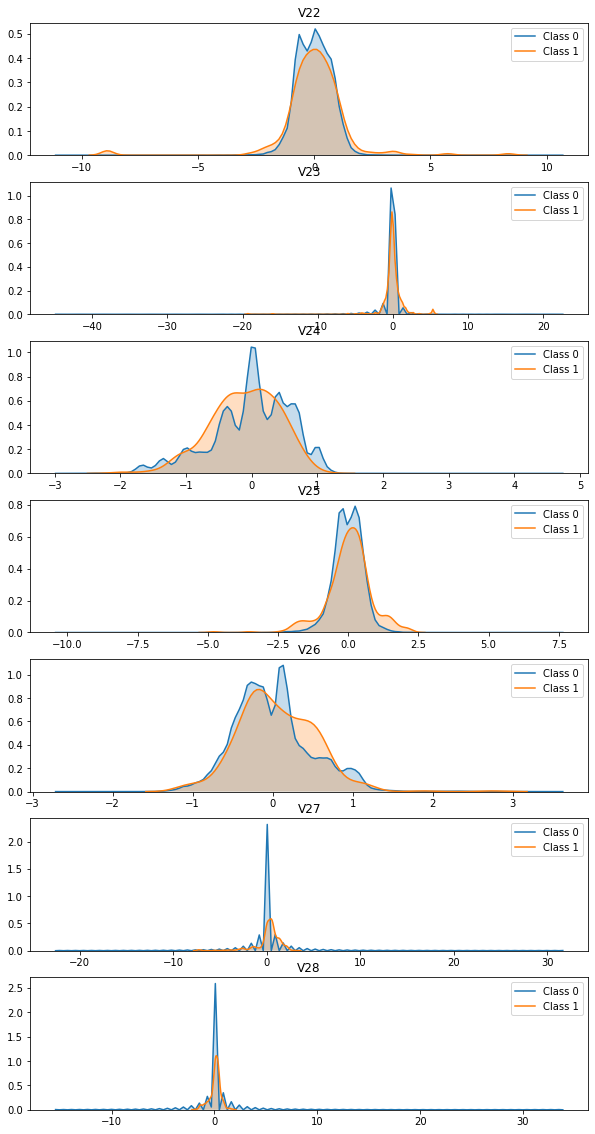

In [13]:
fig, ax = plt.subplots(7,1, figsize = (10,20))

for iter in range(22,29):
    plt.subplot(7,1,iter-21)
    sns.kdeplot(dt[dt['Class']==0]['V'+str(iter)], label="Class 0", shade=True)
    sns.kdeplot(dt[dt['Class']==1]['V'+str(iter)], label="Class 1", shade=True)
    plt.title('V'+str(iter))